In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\ASUS\mydata1.csv")
df.tail()
df["Role_type"] = df["Role_type"].map({"Main": 1, "Side": 0})#dataencoding
print(df)

           character  Age  Screen_time  Role_type  Danger_exposure  \
0        Joyce Byers   41          304          1              2.0   
1       Mike Wheeler   16          341          1              0.5   
2   Dustin Henderson   16          322          1              1.3   
3      Nancy Wheeler   19          360          1              2.0   
4   Steve Harrington   20          296          1              3.0   
5       Max Mayfield   16          315          1              4.0   
6             Hopper   46          378          1              2.5   
7             Eleven   16          487          1              4.0   
8     Lucas Sinclair   16          330          0              2.0   
9           Jonathan   19          216          1              1.5   
10              Will   16          291          0              3.5   
11      Robin Buckly   19           89          0              1.5   
12     Murray Bauman   12           50          0              2.0   
13    Erica Sinclair

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numeric_cols=['Age','Screen_time','Danger_exposure','Arc_completion','Trauma_count','Emotional_depth','Role_type']
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])
df

,character,Age,Screen_time,Role_type,Danger_exposure,Arc_completion,Trauma_count,Emotional_depth,Dies_s5
0,Joyce Byers,0.852941,0.604752,1.0,0.428571,0.50,0.6,0.538462,?
1,Mike Wheeler,0.117647,0.684665,1.0,0.000000,0.50,0.6,0.423077,?
2,Dustin Henderson,0.117647,0.643629,1.0,0.228571,0.50,0.6,0.484615,?
3,Nancy Wheeler,0.205882,0.725702,1.0,0.428571,0.75,1.0,0.807692,?
4,Steve Harrington,0.235294,0.587473,1.0,0.714286,0.75,0.6,0.653846,?
5,Max Mayfield,0.117647,0.628510,1.0,1.000000,1.00,1.0,1.000000,?
6,Hopper,1.000000,0.764579,1.0,0.571429,0.50,0.4,0.461538,?
7,Eleven,0.117647,1.000000,1.0,1.000000,0.25,1.0,0.884615,?
8,Lucas Sinclair,0.117647,0.660907,0.0,0.428571,0.75,0.4,0.461538,?
9,Jonathan,0.205882,0.414687,1.0,0.285714,0.50,0.4,0.384615,?


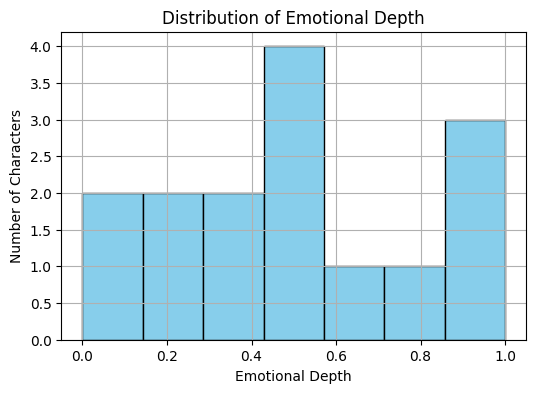

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
df['Emotional_depth'].hist(bins=7, color="skyblue", edgecolor="black")
plt.xlabel('Emotional Depth')
plt.ylabel('Number of Characters')
plt.title('Distribution of Emotional Depth')
plt.show()


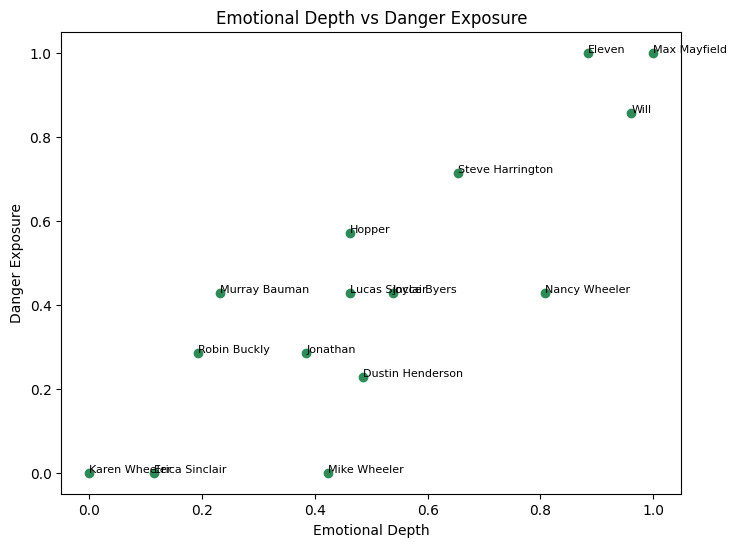

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df['Emotional_depth'], df['Danger_exposure'], color="seagreen")
for i, name in enumerate(df['character']):
    plt.annotate(name, (df['Emotional_depth'][i], df['Danger_exposure'][i]), fontsize=8)
plt.xlabel('Emotional Depth')
plt.ylabel('Danger Exposure')
plt.title('Emotional Depth vs Danger Exposure')
plt.show()


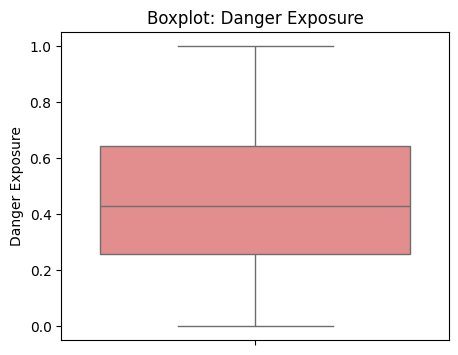

In [8]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df["Danger_exposure"], color="lightcoral")
plt.title('Boxplot: Danger Exposure')
plt.ylabel('Danger Exposure')
plt.show()


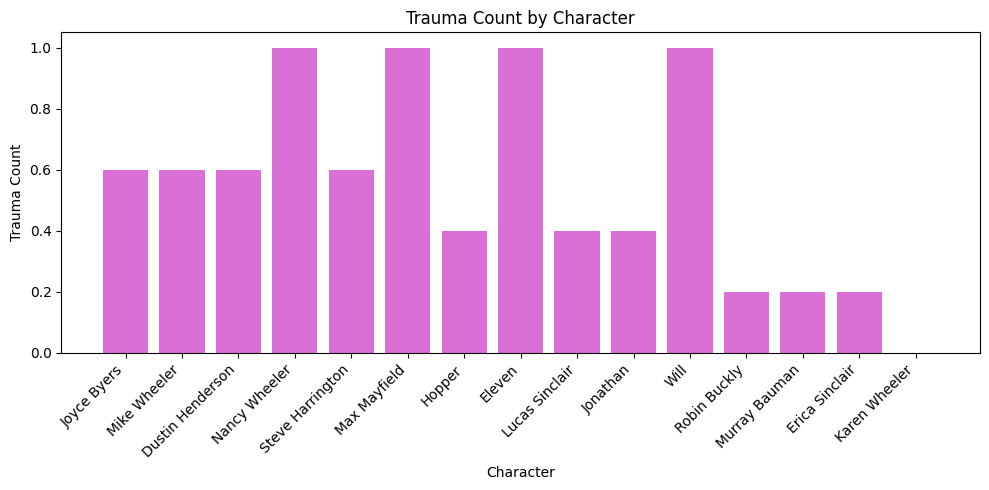

In [14]:
plt.figure(figsize=(10,5))
plt.bar(df['character'], df['Trauma_count'], color="orchid")
plt.xticks(rotation=45, ha="right")
plt.xlabel('Character')
plt.ylabel('Trauma Count')
plt.title('Trauma Count by Character')
plt.tight_layout()
plt.show()


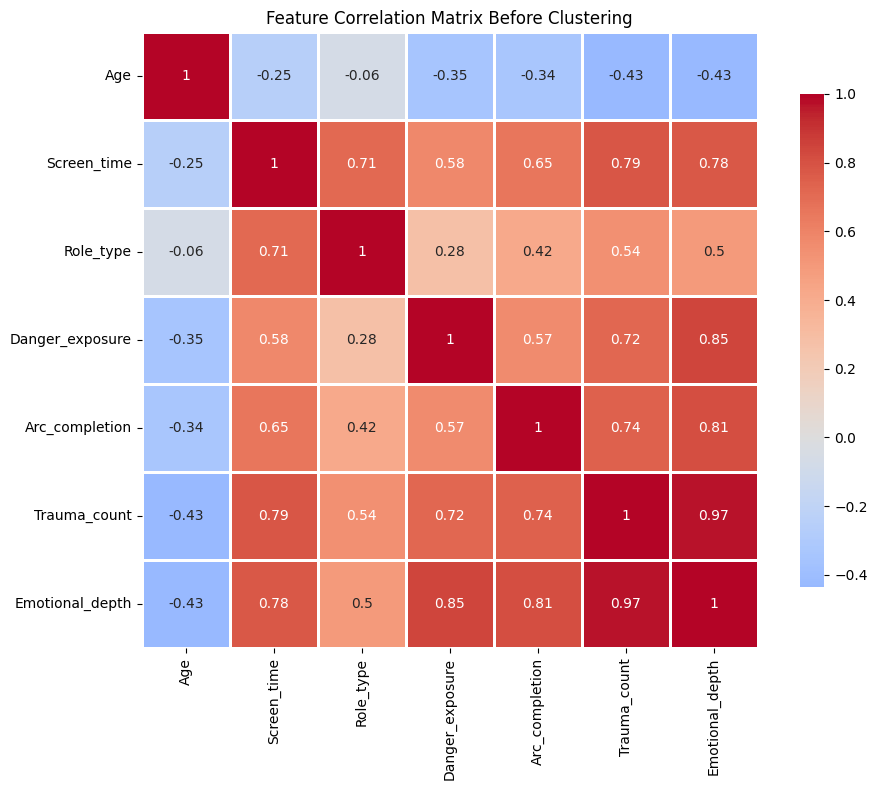

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

features_for_clustering = [
 'Age',
 'Screen_time', 
 'Role_type', 
 'Danger_exposure', 
 'Arc_completion', 
 'Trauma_count', 
 'Emotional_depth'
]

# Calculate correlation matrix
correlation_matrix = df[features_for_clustering].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix Before Clustering')
plt.tight_layout()
plt.show()


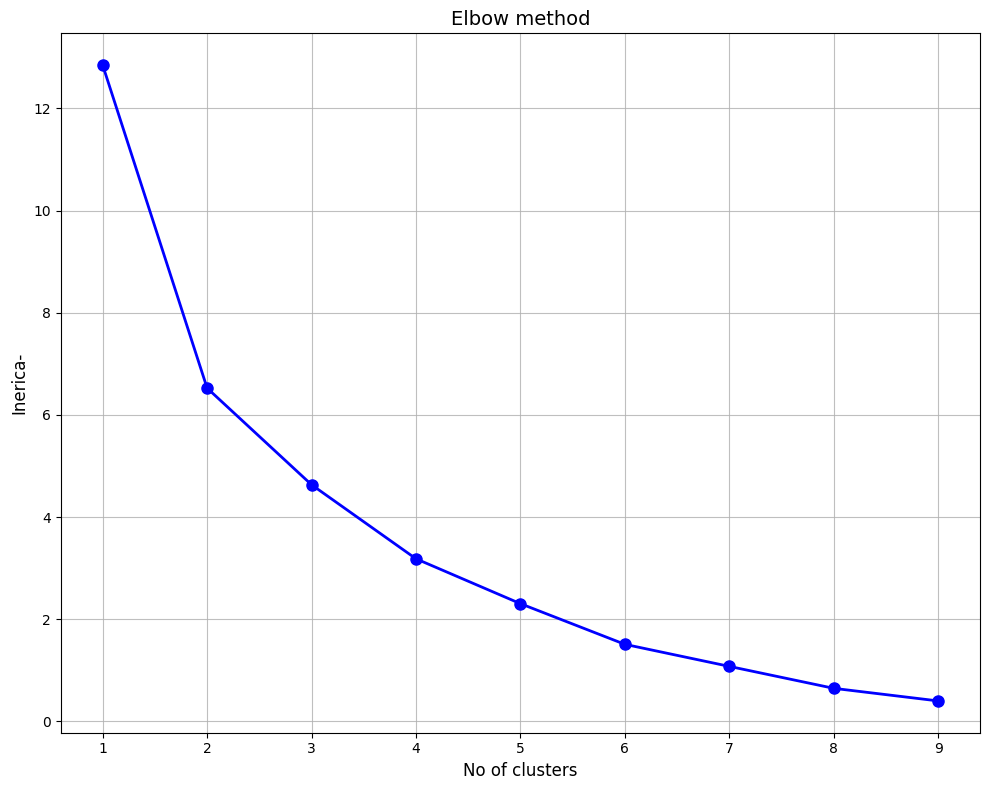

In [22]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias=[]
k_range=range(1,10)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(df[numeric_cols])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,8)) 
plt.plot(k_range,inertias,'bo-',linewidth=2,markersize=8)
plt.xlabel("No of clusters",fontsize=12)
plt.ylabel("Inerica-",fontsize=12)
plt.title("Elbow method",fontsize=14)
plt.grid(alpha=0.8)
plt.xticks(k_range)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.cluster import KMeans

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[numeric_cols])

print(df[['character', 'cluster']])


           character  cluster
0        Joyce Byers        0
1       Mike Wheeler        0
2   Dustin Henderson        0
3      Nancy Wheeler        2
4   Steve Harrington        2
5       Max Mayfield        2
6             Hopper        0
7             Eleven        2
8     Lucas Sinclair        3
9           Jonathan        0
10              Will        3
11      Robin Buckly        1
12     Murray Bauman        1
13    Erica Sinclair        1
14     Karen Wheeler        1


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[numeric_cols])
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], 
                     c=df['cluster'], cmap='viridis', s=200, alpha=0.6, edgecolors='black')

for i, char in enumerate(df['character']):
    plt.annotate(char, (pca_features[i, 0], pca_features[i, 1]), 
                 fontsize=9, ha='center')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('K-Means Clustering Results (4 Clusters) - PCA Visualization')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Cumulative variance explained by PC1 and PC2: {sum(pca.explained_variance_ratio_):.1%}")


In [27]:
print("Cluster Characteristics:")
print(df.groupby('cluster')[['Age', 'Screen_time', 'Role_type', 'Danger_exposure', 
                             'Arc_completion', 'Trauma_count', 'Emotional_depth']].mean())

print("\nCluster Sizes:")
print(df['cluster'].value_counts().sort_index())

print("\nCharacters in each cluster:")
for i in range(4):
    cluster_chars = df[df['cluster'] == i]['character'].tolist()
    print(f"Cluster {i}: {cluster_chars}")


Cluster Characteristics:
              Age  Screen_time  Role_type  Danger_exposure  Arc_completion  \
cluster                                                                      
0        0.458824     0.622462        1.0         0.302857          0.5000   
1        0.500000     0.065335        0.0         0.178571          0.0000   
2        0.169118     0.735421        1.0         0.785714          0.6875   
3        0.117647     0.618790        0.0         0.642857          0.8750   

         Trauma_count  Emotional_depth  
cluster                                 
0                0.52         0.458462  
1                0.15         0.134615  
2                0.90         0.836538  
3                0.70         0.711538  

Cluster Sizes:
cluster
0    5
1    4
2    4
3    2
Name: count, dtype: int64

Characters in each cluster:
Cluster 0: ['Joyce Byers', 'Mike Wheeler', 'Dustin Henderson', 'Hopper', 'Jonathan']
Cluster 1: ['Robin Buckly', 'Murray Bauman', 'Erica Sinclair', 'Kare

              Age  Screen_time  Role_type  Danger_exposure  Arc_completion  \
cluster                                                                      
0        0.458824     0.622462        1.0         0.302857          0.5000   
1        0.500000     0.065335        0.0         0.178571          0.0000   
2        0.169118     0.735421        1.0         0.785714          0.6875   
3        0.117647     0.618790        0.0         0.642857          0.8750   

         Trauma_count  Emotional_depth  
cluster                                 
0                0.52         0.458462  
1                0.15         0.134615  
2                0.90         0.836538  
3                0.70         0.711538  

Characters in each cluster:
Cluster 0: ['Joyce Byers', 'Mike Wheeler', 'Dustin Henderson', 'Hopper', 'Jonathan']
Cluster 1: ['Robin Buckly', 'Murray Bauman', 'Erica Sinclair', 'Karen Wheeler']
Cluster 2: ['Nancy Wheeler', 'Steve Harrington', 'Max Mayfield', 'Eleven']
Cluster 3: ['Luc

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

cluster_risk_score = {0: 0.2, 1: 0.1, 2: 0.7, 3: 0.55}
df['pseudo_label'] = df['cluster'].map(cluster_risk_score)

features = ['Age', 'Screen_time', 'Role_type', 'Danger_exposure', 
            'Arc_completion', 'Trauma_count', 'Emotional_depth']

X_numeric = df[features]

encoder = OneHotEncoder(drop='first', sparse_output=False)
cluster_encoded = encoder.fit_transform(df[['cluster']])
cluster_cols = [f'cluster_{cat}' for cat in encoder.categories_[0][1:]]

cluster_df = pd.DataFrame(cluster_encoded, columns=cluster_cols)

X = pd.concat([X_numeric.reset_index(drop=True), cluster_df], axis=1)
y = df['pseudo_label']


model = LinearRegression()
model.fit(X, y)
df['Dies_s5_probability'] = model.predict(X)
df['Dies_s5_prediction'] = (df['Dies_s5_probability'] > 0.5).astype(int)


print(df[['character', 'cluster', 'Dies_s5_probability', 'Dies_s5_prediction']].sort_values('Dies_s5_probability', ascending=False))

feature_importance = pd.Series(model.coef_, index=X.columns)
print("\nFeature coefficients:")
print(feature_importance.sort_values(ascending=False))


           character  cluster  Dies_s5_probability  Dies_s5_prediction
5       Max Mayfield        2                 0.70                   1
3      Nancy Wheeler        2                 0.70                   1
4   Steve Harrington        2                 0.70                   1
7             Eleven        2                 0.70                   1
10              Will        3                 0.55                   1
8     Lucas Sinclair        3                 0.55                   1
0        Joyce Byers        0                 0.20                   0
2   Dustin Henderson        0                 0.20                   0
9           Jonathan        0                 0.20                   0
1       Mike Wheeler        0                 0.20                   0
6             Hopper        0                 0.20                   0
12     Murray Bauman        1                 0.10                   0
11      Robin Buckly        1                 0.10                   0
13    